In [2]:
import numpy as np

## 계단 함수

In [3]:
def step_function(x:np.array):
    '''
    x가 0보다 크면 1, x가 0이하면 0을 반환하는 함수를 구현하세요.
    array를 입력으로 제공한다는 것에 주의하세요.
    '''
    #### 코드 ####
    y = x > 0
    return y.astype(np.int32)

In [4]:
x = np.array([-1.2, 1.8, 2.3])
y = step_function(x)
assert (y == np.array([0,1,1])).all(), '오답입니다.'

## 시그모이드

In [5]:
def sigmoid(x:np.array):
    '''
    시그모이드 함수를 구현하세요. 수식은 따로 제공되지 않습니다.
    '''
    return 1 / (1 + np.exp(-x))

In [17]:
x = np.array([1.0, 2.0, 3.0])
y = sigmoid(x)
assert np.allclose(y,[0.73105858, 0.88079708, 0.95257413]), '오답입니다.'

## ReLU

In [18]:
def relu(x:np.array):
    '''
    ReLU 함수를 구현하세요. 수식은 따로 제공되지 않습니다.
    '''
    return np.maximum(0, x)

In [21]:
x = np.array([-1.2, -1.8, 2.3])
y = relu(x)
assert (y == np.array([0,0,2.3])).all(), '오답입니다.'

## Softmax

In [23]:
def softmax(x):
    '''
    Softmax 함수를 구현하세요. 수식은 따로 제공되지 않습니다.
    '''
    #### 코드 ####
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x

    return y


In [30]:
x = np.array([0.3, 2.9, 4.0])
y = softmax(x)
assert np.allclose(y, np.array([0.01821127, 0.24519181, 0.73659691])), '오답입니다.'

## Batch Neural Net

In [31]:
import pickle
from dataset.mnist import load_mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

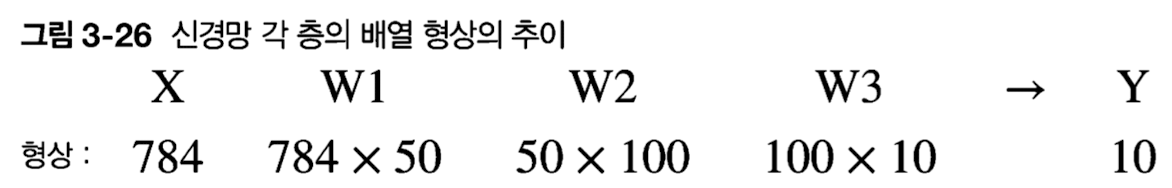

In [32]:
def predict(network, x):
    '''
    위 이미지를 참고하여 네트워크를 구축하고 적절한 y값을 반환할 수 있도록 코드를 작성하세요.
    '''
    #### 코드 ####
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [40]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

accuracy = accuracy_cnt / len(x)
assert accuracy == 0.9352, "구현 결과가 교재와 다릅니다."